In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train'
valid_path = '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1656 images belonging to 6 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 6 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
52/52 [==============================] - 43s 665ms/step - loss: 0.6003 - accuracy: 0.7929 - val_loss: 1.0570 - val_accuracy: 0.8750
Epoch 2/10
52/52 [==============================] - 20s 384ms/step - loss: 0.1580 - accuracy: 0.9432 - val_loss: 0.6306 - val_accuracy: 0.9028
Epoch 3/10
52/52 [==============================] - 19s 372ms/step - loss: 0.1091 - accuracy: 0.9686 - val_loss: 0.8744 - val_accuracy: 0.8750
Epoch 4/10
52/52 [==============================] - 20s 378ms/step - loss: 0.0921 - accuracy: 0.9740 - val_loss: 0.5793 - val_accuracy: 0.8889
Epoch 5/10
52/52 [==============================] - 20s 376ms/step - loss: 0.0606 - accuracy: 0.9831 - val_loss: 1.1798 - val_accuracy: 0.8889
Epoch 6/10
52/52 [==============================] - 20s 373ms/step - loss: 0.0605 - accuracy: 0.9849 - val_loss: 0.6065 - val_accuracy: 0.9167
Epoch 7/10
52/52 [==============================] - 20s 380ms/step - loss: 0.0483 - accuracy: 0.9879 - val_loss: 1.0348 - val_accuracy: 0.9167

In [14]:
import matplotlib.pyplot as plt

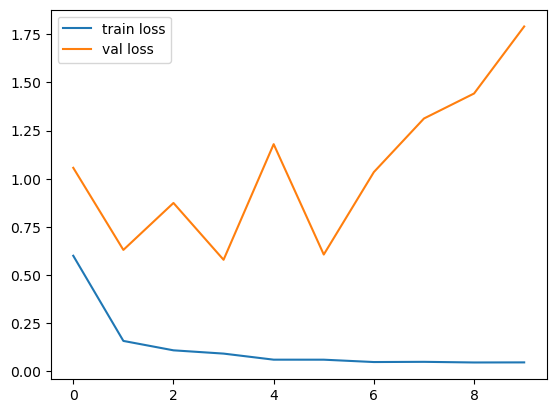

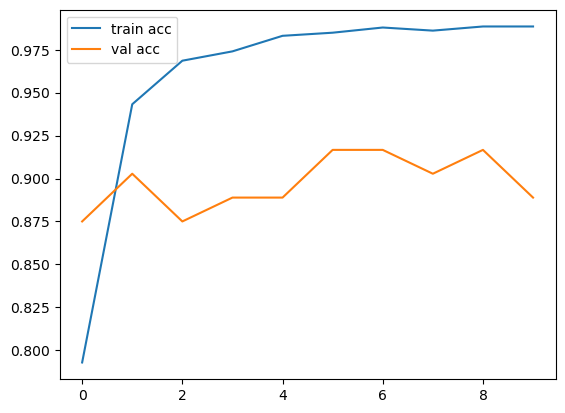

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')